**6/21/23**

This notebook is for graphing data related to TGase3 ELISAs.

In [1]:
from elliot_utils import *
from scipy import stats

In [2]:
analysisPath = Path.cwd().joinpath('analysis_files/tgase3_elisa/')
figPath = Path.cwd().joinpath('figures/tgase3_elisa/')

In [3]:
# Graph the raw ELISA results
data61923elisa = pd.read_csv(analysisPath.joinpath('6-19-23_tgase3_pilot.csv'))

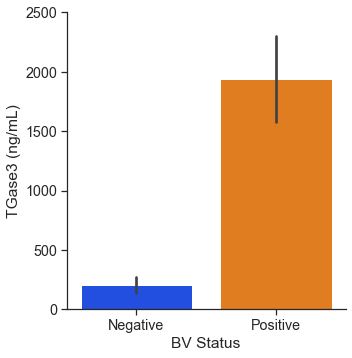

In [10]:
plot = sns.catplot(data=data61923elisa, x='BV Status', y='TGase3 (ng/mL)', kind='bar', aspect=1)
plot.set(ylim=(0, 2500))
plot.savefig(figPath.joinpath('6-19-23_raw_elisa.png'), bbox_inches='tight', dpi=300)

In [11]:
# Graph the bradford and TGase3 concentration results
data61923bradford = pd.read_csv(analysisPath.joinpath('6-19-23_protein_tgase3_concentration.csv'))

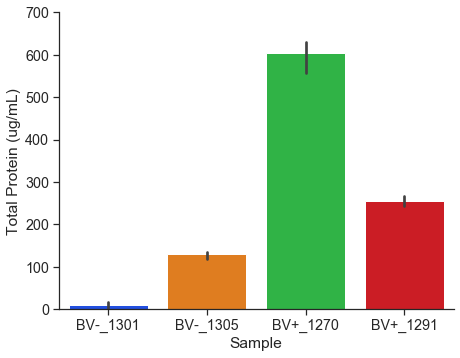

In [16]:
plot = sns.catplot(data=data61923bradford, x='Sample', y='Total Protein (ug/mL)', kind='bar', aspect=1.3)
plot.set(ylim=(0, 700))
plot.savefig(figPath.joinpath('6-19-23_bradford.png'), bbox_inches='tight', dpi=300)

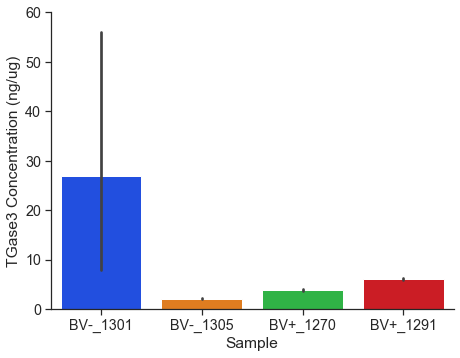

In [18]:
plot = sns.catplot(data=data61923bradford, x='Sample', y='TGase3 Concentration (ng/ug)', kind='bar', aspect=1.3)
plot.set(ylim=(0, 60))
plot.savefig(figPath.joinpath('6-19-23_tgase3_concs.png'), bbox_inches='tight', dpi=300)

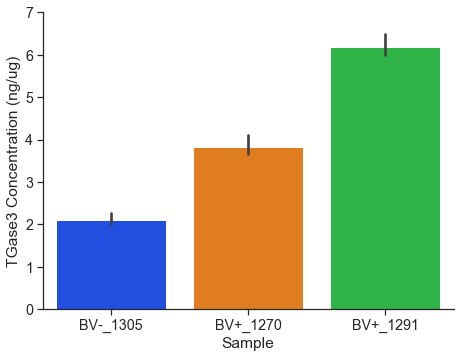

In [21]:
plotOrder = ['BV-_1305', 'BV+_1270', 'BV+_1291']
plot = sns.catplot(data=data61923bradford, x='Sample', y='TGase3 Concentration (ng/ug)', kind='bar', aspect=1.3, order=plotOrder)
plot.set(ylim=(0, 7))
plot.savefig(figPath.joinpath('6-19-23_tgase3_concs_nooutlier.png'), bbox_inches='tight', dpi=300)

In [5]:
# Graph results as of 7-21-23
data72123 = pd.read_csv(analysisPath.joinpath('7-21-23.csv'))

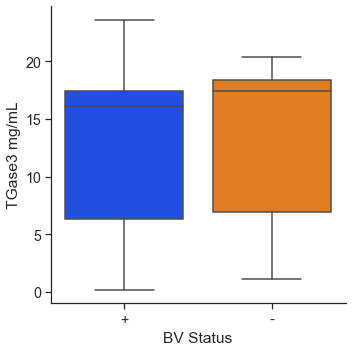

In [6]:
plot = sns.catplot(data=data72123, x='BV Status', y='TGase3 mg/mL', kind='box')
#plot.set(ylim=(0, 7))
#plot.savefig(figPath.joinpath('6-19-23_tgase3_concs_nooutlier.png'), bbox_inches='tight', dpi=300)

In [4]:
# Graph cumulative results from 8/15/23
data81523 = pd.read_csv(analysisPath.joinpath('8-15-23_cumulative.csv'))

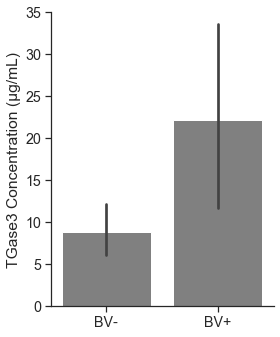

In [8]:
plotOrder = ['-', '+']
plot = sns.catplot(data=data81523, x='BV Status', y='TGase3 ug/mL', kind='bar', color='gray', aspect=0.8, order=plotOrder)
plot.set(ylim=(0, 35), ylabel='TGase3 Concentration (µg/mL)', xlabel='')
plot.set_xticklabels(['BV-', 'BV+'])
#plot.savefig(figPath.joinpath('8-15-23_cumulative.png'), bbox_inches='tight', dpi=300)

In [9]:
# Run the stats
plusData = []
minusData = []
for index, row in data81523.iterrows():
    if row['BV Status'] == '-':
        minusData.append(row['TGase3 ug/mL'])
    else:
        plusData.append(row['TGase3 ug/mL'])
print(stats.ttest_ind(plusData, minusData, equal_var=False))

Ttest_indResult(statistic=2.2594893507568714, pvalue=0.0420473775759024)
